## 什么是激活函数

生物神经网络启发了人工神经网络的发展。但是，ANN 并非大脑运作的近似表示。不过在我们了解为什么在人工神经网络中使用激活函数之前，先了解生物神经网络与激活函数的相关性是很有用处的。

典型神经元的物理结构包括细胞体（cell body）、向其他神经元发送信号的轴突（axon）和接收其他神经元发送的信号或信息的树突（dendrites）。

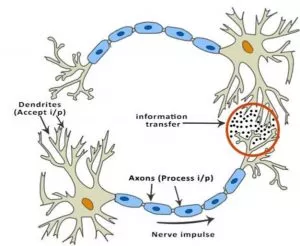

上图中，红色圆圈代表两个神经元交流的区域。神经元通过树突接收来自其他神经元的信号。树突的权重叫作突触权值（synaptic weight），将和接收的信号相乘。来自树突的信号在细胞体内不断累积，如果信号强度超过特定阈值，则神经元向轴突传递信息。如未超过，则信号被该神经元「杀死」，无法进一步传播。

激活函数决定是否传递信号。在这种情况下，只需要带有一个参数（阈值）的简单阶梯函数。现在，当我们学习了一些新的东西（或未学习到什么）时，一些神经元的阈值和突触权值会发生改变。这使得神经元之间产生新的连接，大脑学会新的东西。

__让我们再次理解这一概念，不过这次要使用人工神经元。__

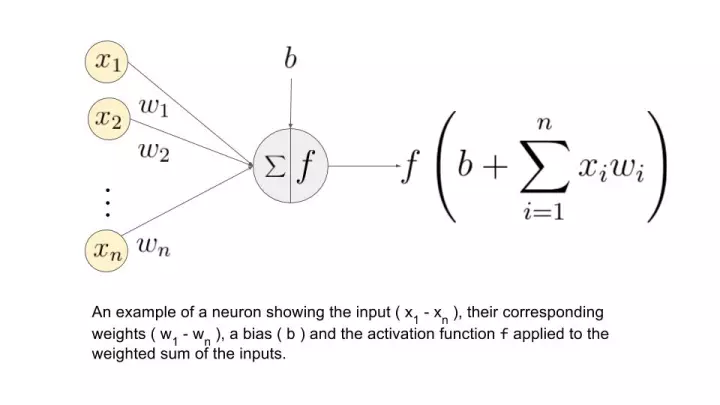

上图中 $(x_1, ..., x_n)$ 是信号向量，它和权重 $(w_1, ..., w_n)$ 相乘。然后再累加（即求和 $+$ 偏置项 $b$）。最后，激活函数 $f$ 应用于累加的总和。

注意：权重 $(w_1, ..., w_n)$ 和偏置项 $b$ 对输入信号进行线性变换。而激活函数对该信号进行非线性变换，这使得我们可以任意学习输入和输出之间的复杂变换。

过去已经出现了很多种函数，但是寻找使神经网络更好更快学习的激活函数仍然是活跃的研究方向。

## 常见激活函数的类型

### 线性激活函数

这是一种简单的线性函数，公式为：$f(x) = \sum_{i=1}^{n} w_ix_i + b$

In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

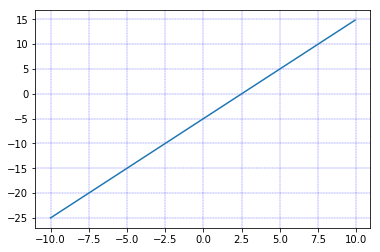

In [86]:
def line(a, b, x):
    return a * x + b
x = np.arange(-10, 10, 0.1)
y = line(2, -5, x)
plt.plot(x, y)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')

### 非线性激活函数

用于分离非线性可分的数据，是最常用的激活函数。非线性方程控制输入到输出的映射。非线性激活函数有 Sigmoid、Tanh、ReLU、LReLU、PReLU、Swish 等。下文中将详细介绍这些激活函数。

#### 为什么人工神经网络需要非线性激活函数

神经网络用于实现复杂的函数，非线性激活函数可以使神经网络随意逼近复杂函数。没有激活函数带来的非线性，多层神经网络和单层无异。

现在我们来看一个简单的例子，帮助我们了解为什么没有非线性，神经网络甚至无法逼近异或门（XOR gate）、同或门（XNOR gate）等简单函数。下图是一个异或门函数。叉和圈代表了数据集的两个类别。当 x_1、x_2 两个特征一样时，类别标签是红叉；不一样，就是蓝圈。两个红叉对于输入值 (0,0) 和 (1,1) 都有输出值 0，两个蓝圈对于输入值 (0,1) 和 (1,0) 都有输出值 1。

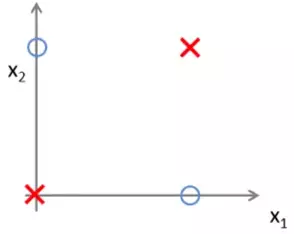

从上图中，我们可以看到数据点非线性可分。也就是说，我们无法画出一条直线使蓝圈和红叉分开来。因此，我们需要一个非线性决策边界（non-linear decision boundary）来分离它们。

激活函数对于将神经网络的输出压缩进特定边界内也非常关键。神经元的输出值可以非常大。该输出在未经修改的情况下馈送至下一层神经元时，可以被转换成更大的值，这样过程就需要极大算力。激活函数的一个任务就是将神经元的输出映射到有界的区域（如，0 到 1 之间）。

了解这些背景知识之后，我们就可以了解不同类型的激活函数了。

#### 不同类型的非线性激活函数

##### Sigmoid

Sigmoid又叫作 Logistic 激活函数，它将实数值压缩进 0 到 1 的区间内，还可以在预测概率的输出层中使用。该函数将大的负数转换成 0，将大的正数转换成 1。<br>
数学公式为：$\sigma(x)=\frac{1}{1+e^{-x}}$

In [55]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

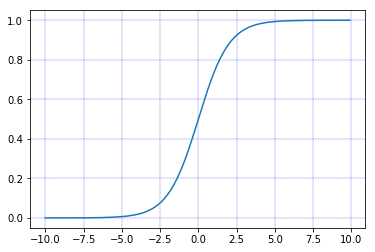

In [57]:
x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')

Sigmoid函数的倒数公式为：$\sigma^{'}(x) = \sigma(x)(1-\sigma(x))$

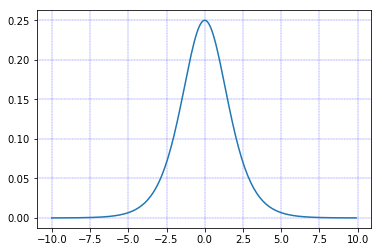

In [58]:
x = np.arange(-10, 10, 0.1)
y = sigmoid(x)*(1-sigmoid(x))
plt.plot(x, y)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')

__Sigmoid函数的三个主要缺陷:__
1. 梯度消失：注意：Sigmoid 函数趋近 0 和 1 的时候变化率会变得平坦，也就是说，Sigmoid 的梯度趋近于 0。神经网络使用 Sigmoid 激活函数进行反向传播时，输出接近 0 或 1 的神经元其梯度趋近于 0。这些神经元叫作饱和神经元。因此，这些神经元的权重不会更新。此外，与此类神经元相连的神经元的权重也更新得很慢。该问题叫作梯度消失。因此，想象一下，如果一个大型神经网络包含 Sigmoid 神经元，而其中很多个都处于饱和状态，那么该网络无法执行反向传播。
2. 不以零为中心：Sigmoid 输出不以零为中心的。
3. 计算成本高昂：exp() 函数与其他非线性激活函数相比，计算成本高昂。 

__下一个要讨论的非线性激活函数解决了 Sigmoid 函数中值域期望不为 0 的问题。__

##### Tanh

Tanh 激活函数又叫作双曲正切激活函数（hyperbolic tangent activation function）。与 Sigmoid 函数类似，Tanh 函数也使用真值，但 Tanh 函数将其压缩至-1 到 1 的区间内。与 Sigmoid 不同，Tanh 函数的输出以零为中心，因为区间在-1 到 1 之间。你可以将 Tanh 函数想象成两个 Sigmoid 函数放在一起。在实践中，Tanh 函数的使用优先性高于 Sigmoid 函数。负数输入被当作负值，零输入值的映射接近零，正数输入被当作正值。

数学公式为：$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

In [59]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

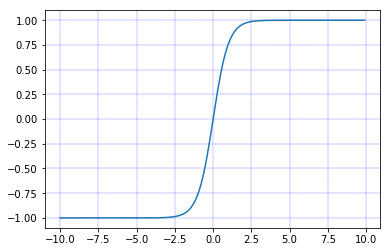

In [60]:
x = np.arange(-10, 10, 0.1)
y = tanh(x)
plt.plot(x, y)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')

tanh激活函数的导数公式为：$tanh^{'}(x) = 1 - tanh^2(x)$

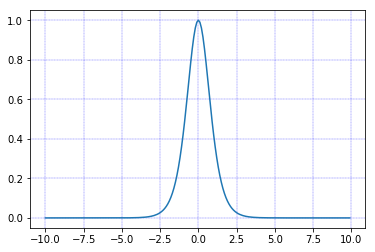

In [61]:
x = np.arange(-10, 10, 0.1)
y = 1 - tanh(x) ** 2
plt.plot(x, y)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')

__唯一的缺点是：__

1. Tanh 函数也会有梯度消失的问题，因此在饱和时也会「杀死」梯度。

__为了解决梯度消失问题，我们来讨论另一个非线性激活函数——修正线性单元（rectified linear unit，ReLU），该函数明显优于前面两个函数，是现在使用最广泛的函数。__

##### 修正线性单元（ReLU）

ReLU是从底部开始半修正的一种函数。数学公式为：$f(x) = max(0, x)$

In [63]:
def relu(x):
    n = x.shape[0]
    y = np.zeros((n, 1))
    for i in range(n):
        y[i] = max(0, x[i])
    return y

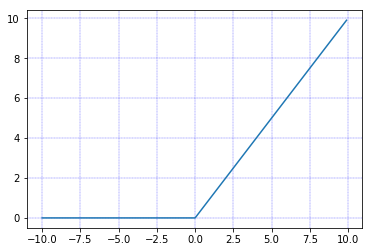

In [64]:
x = np.arange(-10, 10, 0.1)
y = relu(x)
plt.plot(x, y)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')

当输入 $x<0$ 时，输出为 $0$，当 $x> 0$ 时，输出为 $x$。该激活函数使网络更快速地收敛。它不会饱和，即它可以对抗梯度消失问题，至少在正区域（$x>$ 0 时）可以这样，因此神经元至少在一半区域中不会把所有零进行反向传播。由于使用了简单的阈值化（thresholding），ReLU 计算效率很高。但是 ReLU 神经元也存在一些缺点：

1. 不以零为中心：和 Sigmoid 激活函数类似，ReLU 函数的输出不以零为中心。
2. 前向传导（forward pass）过程中，如果 $x < 0$，则神经元保持非激活状态，且在后向传导（backward pass）中「杀死」梯度。这样权重无法得到更新，网络无法学习。当 $x = 0$ 时，该点的梯度未定义，但是这个问题在实现中得到了解决，通过采用左侧或右侧的梯度的方式。

__为了解决 ReLU 激活函数中的梯度消失问题，当 x < 0 时，我们使用 Leaky ReLU——该函数试图修复 dead ReLU 问题。下面我们就来详细了解 Leaky ReLU。__

##### Leaky ReLU

该函数试图缓解 dead ReLU 问题。数学公式为：$f(x) = max(0.1x, x)$

In [65]:
def leaky_relu(x):
    n = x.shape[0]
    y = np.zeros((n, 1))
    for i in range(n):
        y[i] = max(0.1 * x[i], x[i])
    return y

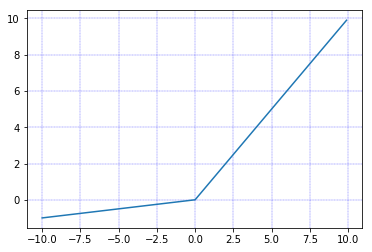

In [66]:
x = np.arange(-10, 10, 0.1)
y = leaky_relu(x)
plt.plot(x, y)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')

Leaky ReLU 的概念是：当 $x < 0$ 时，它得到 $0.1$ 的正梯度。该函数一定程度上缓解了 dead ReLU 问题，但是使用该函数的结果并不连贯。尽管它具备 ReLU 激活函数的所有特征，如计算高效、快速收敛、在正区域内不会饱和。

__Leaky ReLU 可以得到更多扩展。不让 x 乘常数项，而是让 x 乘超参数，这看起来比 Leaky ReLU 效果要好。该扩展就是 Parametric ReLU。__

##### Parametric ReLU

PReLU 函数的数学公式为：$f(x) = max(\alpha x, x)$

In [67]:
def prelu(alpha, x):
    n = x.shape[0]
    y = np.zeros((n, 1))
    for i in range(n):
        y[i] = max(alpha * x[i], x[i])
    return y

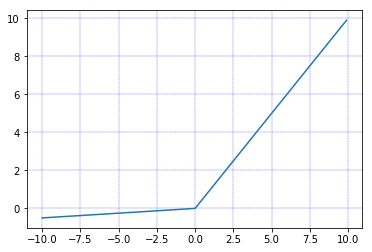

In [68]:
x = np.arange(-10, 10, 0.1)
y = prelu(0.05, x)
plt.plot(x, y)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')

其中是超参数。这里引入了一个随机的超参数，它可以被学习，因为你可以对它进行反向传播。这使神经元能够选择负区域最好的梯度，有了这种能力，它们可以变成 ReLU 或 Leaky ReLU。

__总之，最好使用 ReLU，但是你可以使用 Leaky ReLU 或 Parametric ReLU 实验一下，看看它们是否更适合你的问题。__

##### ELU

数学公式为：
\begin{equation}
f(x)=
\begin{cases}
x& \text{if x > 0}\\
\alpha(e^x-1)& \text{if } x \le 0
\end{cases}
\end{equation}

In [69]:
def elu(alpha, x):
    n = x.shape[0]
    y = np.zeros((n, 1))
    for i in range(n):
        if(x[i] > 0):
            y[i] = x[i]
        else:
            y[i] = alpha * (np.exp(x[i]) - 1)
    return y

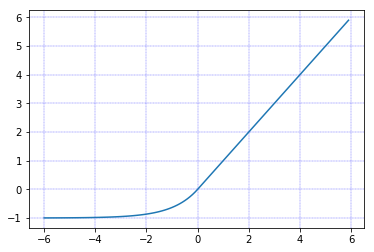

In [70]:
x = np.arange(-6, 6, 0.1)
y = elu(1, x)
plt.plot(x, y)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')

ELU激活函数的导数公式为:
\begin{equation}
f^{'}(x)=
\begin{cases}
1& \text{if x > 0}\\
\ f(x)+\alpha& \text{if } x \le 0
\end{cases}
\end{equation}

### 激活函数曲线汇总图

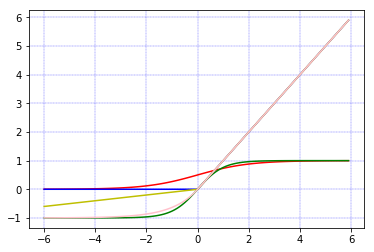

In [82]:
x = np.arange(-6, 6, 0.1)
y = sigmoid(x)
plt.plot(x, y, 'r')
y = tanh(x)
plt.plot(x, y, 'g')
y = relu(x)
plt.plot(x, y, 'b')
y = leaky_relu(x)
plt.plot(x, y, 'y')
y = elu(1, x)
plt. plot(x, y, 'pink')
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')

##### 补充-------Swish激活函数

该函数又叫作自门控激活函数，它近期由谷歌的研究者发布。<br>
数学公式为：$f(x) = \frac{x}{1+e^{-x}}$

In [83]:
def swish(x):
    return x / (1 + np.exp(-x))

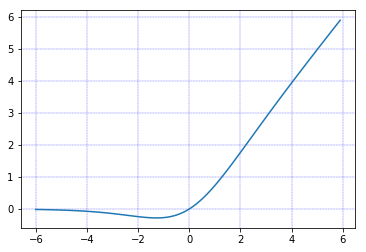

In [84]:
x = np.arange(-6, 6, 0.1)
y = swish(x)
plt.plot(x, y)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')

swish激活函数的导数公式：$f^{'}(x) = f(x) + \sigma(x)(1-f(x))$

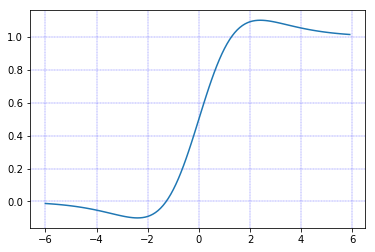

In [85]:
x = np.arange(-6, 6, 0.1)
y = swish(x) + sigmoid(x)*(1-swish(x))
plt.plot(x, y)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')